In [89]:
import pandas as pd 
import numpy as np
import seaborn as sns
pd.set_option('max_columns',200)
pd.set_option('max_rows',2000)

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.ensemble import RandomForestRegressor
#记住这里是在做regression，所以import的是randomforestregressor

from sklearn.metrics import mean_squared_error
from math import sqrt

In [90]:
df_train = pd.read_csv('train_agg.csv',low_memory=False)
df_test = pd.read_csv('test_agg.csv',low_memory=False)

In [78]:
df_train

,channelGrouping.Other.,channelGroupingAffiliates,channelGroupingDirect,channelGroupingDisplay,channelGroupingOrganic.Search,channelGroupingPaid.Search,channelGroupingReferral,channelGroupingSocial,fullVisitorId,visitNumber,device.deviceCategorydesktop,device.deviceCategorymobile,device.deviceCategorytablet,geoNetwork.continentAfrica,geoNetwork.continentAmericas,geoNetwork.continentAsia,geoNetwork.continentEurope,geoNetwork.continentOceania,totals.hits,totals.pageviews,totals.bounces,totals.newVisits,trafficSource.isTrueDirect,trafficSource.adwordsClickInfo.isVideoAd,weekday,ad_page_1,GoogleSearch,month1,month2,month3,month4,month5,month6,month7,month8,month9,month10,month11,month12,dayFriday,dayMonday,daySaturday,daySunday,dayThursday,dayTuesday,dayWednesday,browser_Chrome,browser_Safari,browser_Firefox,browser_IE,browser_AndroidWebview,browser_Safariapp,browser_OperaMini,browser_Opera,device.operatingSystem.iOS,device.operatingSystem.Linux,device.operatingSystem.Macintosh,device.operatingSystem.Windows,device.operatingSystem.Android,device.operatingSystem.Chrome.OS,geoNetwork.subContinent.Northern.America,geoNetwork.country.Brazil,geoNetwork.country.Canada,geoNetwork.country.Germany,geoNetwork.country.India,geoNetwork.country.Japan,geoNetwork.country.Thailand,geoNetwork.country.Turkey,geoNetwork.country.United.Kingdom,geoNetwork.country.United.States,geoNetwork.country.Vietnam,geoNetwork.city.London,geoNetwork.city.Los.Angeles,geoNetwork.city.Mountain.View,geoNetwork.city.New.York,geoNetwork.city.San.Francisco,geoNetwork.city.San.Jose,geoNetwork.city.Sunnyvale,isCampaign,trafficSource.adwordsClickInfo.slot.RHS,trafficSource.adwordsClickInfo.slot.Top,device.browser.Edge,logtransaction
0,0,0,0,0,0,0,0,1,9621491240036710400,1,0,1,0,0,0,0,1,0,1,1,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0.0
1,0,0,0,0,0,0,0,1,6139157875722543104,1,1,0,0,0,0,1,0,0,1,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
2,0,0,0,0,0,0,0,1,139022366141155440,1,1,0,0,0,0,1,0,0,1,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
3,0,0,0,0,1,0,0,0,8960378340904253440,1,1,0,0,0,1,0,0,0,1,1,1,1,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0.0
4,0,0,0,0,1,0,0,0,4195740360175440896,1,1,0,0,0,0,1,0,0,1,1,1,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71455,0,0,0,0,0,0,0,2,1897526774187457280,3,2,0,0,0,0,0,2,0,11,10,0,1,0,2,2,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,2,0,2,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
71456,0,0,0,0,0,0,2,0,15744329197940568064,3,2,0,0,0,0,0,2,0,2,2,2,1,1,2,2,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,2,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
71457,0,0,2,0,0,0,0,0,9367481413184516096,3,2,0,0,0,2,0,0,0,14,10,1,1,2,2,2,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,1,0,0,0,1,0,2,0,0,0,0,0,0,0,0,0,2,0,0,0,2,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
71458,0,0,0,0,0,1,0,0,2387917027071718400,1,0,1,0,0,1,0,0,0,2,2,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0.0


### train 和 test

In [95]:
data_train = df_train.drop(['fullVisitorId'],axis=1)
data_test = df_test.drop(['fullVisitorId'],axis=1)

In [96]:
X_train = data_train.drop(['logtransaction'],axis=1)

feature_list = list(X_train.columns)

X_train = X_train.values
y_train=data_train['logtransaction'].values 
print(X_train.shape,y_train.shape)

(322200, 81) (322200,)


In [97]:
X_test = data_test.drop(['logtransaction'],axis=1)
X_test = X_test.values

y_test=data_test['logtransaction'].values 
y_test.shape

print(X_test.shape,y_test.shape)

(71460, 81) (71460,)


In [98]:
#建模
rf = RandomForestRegressor(n_estimators=1000,random_state=0)

#训练
rf.fit(X_train,y_train)

#prediction
prediction_test = rf.predict(X_test)
prediction_train = rf.predict(X_train)

In [100]:
rmse_train = sqrt(mean_squared_error(y_train, prediction_train))

print('rmse - train: ',rmse_train)

rmse - train:  0.4489726661397232


In [101]:
rmse_test = sqrt(mean_squared_error(y_test, prediction_test))

print('rmse - test: ',rmse_test)

rmse - test:  1.6768254351845573


In [102]:
# get the feature importance
importances = list(rf.feature_importances_)

# transform the formula
feature_importances = [(feature, importance) for feature, importance in zip(feature_list, importances)]

# descending order
feature_importances = sorted(feature_importances, key= lambda x:x[1], reverse=True)

# print out
for a in feature_importances:
    print('Variable: {}      Importance:{}'.format(a[0],a[1]))


Variable: totals.pageviews      Importance:0.6948833336522002
Variable: geoNetwork.country.United.States      Importance:0.055742952153724094
Variable: totals.hits      Importance:0.03293622820945334
Variable: visitNumber      Importance:0.00971930271413638
Variable: channelGroupingOrganic.Search      Importance:0.007535607153379104
Variable: dayWednesday      Importance:0.007088146964758378
Variable: month8      Importance:0.006350128736661078
Variable: dayMonday      Importance:0.006309650995238524
Variable: device.deviceCategorydesktop      Importance:0.0063089300770146845
Variable: month9      Importance:0.006153650221250912
Variable: dayTuesday      Importance:0.005966005732837981
Variable: device.operatingSystem.Macintosh      Importance:0.005940563780490867
Variable: dayFriday      Importance:0.005928398264814926
Variable: dayThursday      Importance:0.005872663351188957
Variable: weekday      Importance:0.0053894227475691165
Variable: month10      Importance:0.00538383077901753

In [103]:
# order the features
sorted_importances = [importance[1] for importance in feature_importances]
sorted_features = [importance[0] for importance in feature_importances]

# cumulative_importances
cumulative_importances = np.cumsum(sorted_importances)

cumulative_importances

array([0.69488333, 0.75062629, 0.78356251, 0.79328182, 0.80081742,
       0.80790557, 0.8142557 , 0.82056535, 0.82687428, 0.83302793,
       0.83899394, 0.8449345 , 0.8508629 , 0.85673556, 0.86212498,
       0.86750882, 0.87279351, 0.87794445, 0.88298984, 0.88801569,
       0.8927762 , 0.89751766, 0.90225511, 0.90663782, 0.91093098,
       0.91520669, 0.91944928, 0.92358679, 0.92772405, 0.93182434,
       0.93580376, 0.93943611, 0.94293063, 0.94641998, 0.9498248 ,
       0.95310594, 0.95628888, 0.95929008, 0.96227163, 0.9651604 ,
       0.9678849 , 0.97053751, 0.97313013, 0.97550928, 0.97781321,
       0.98002713, 0.98199398, 0.98378921, 0.98530509, 0.98672892,
       0.98806366, 0.98934061, 0.99055249, 0.99175542, 0.99294357,
       0.99379703, 0.99448426, 0.99516505, 0.99583268, 0.99645728,
       0.99705847, 0.99762024, 0.9980935 , 0.99855671, 0.99879684,
       0.99902172, 0.99916987, 0.99930914, 0.99942455, 0.99953936,
       0.99965144, 0.99976332, 0.99983698, 0.99989709, 0.99994

In [104]:
sorted_features

['totals.pageviews',
 'geoNetwork.country.United.States',
 'totals.hits',
 'visitNumber',
 'channelGroupingOrganic.Search',
 'dayWednesday',
 'month8',
 'dayMonday',
 'device.deviceCategorydesktop',
 'month9',
 'dayTuesday',
 'device.operatingSystem.Macintosh',
 'dayFriday',
 'dayThursday',
 'weekday',
 'month10',
 'geoNetwork.subContinent.Northern.America',
 'month5',
 'month11',
 'month12',
 'trafficSource.isTrueDirect',
 'device.operatingSystem.Windows',
 'channelGroupingDirect',
 'month1',
 'channelGroupingReferral',
 'geoNetwork.city.Mountain.View',
 'month4',
 'month6',
 'month7',
 'geoNetwork.city.New.York',
 'month3',
 'daySunday',
 'browser_Chrome',
 'month2',
 'daySaturday',
 'geoNetwork.continentAmericas',
 'totals.bounces',
 'geoNetwork.city.San.Francisco',
 'device.operatingSystem.Chrome.OS',
 'geoNetwork.city.Sunnyvale',
 'browser_Safari',
 'device.deviceCategorymobile',
 'geoNetwork.city.San.Jose',
 'device.operatingSystem.Linux',
 'trafficSource.adwordsClickInfo.isVideo

In [87]:
from pprint import pprint
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 1000,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}


### 2

In [240]:
df_train = pd.read_csv('train_agg.csv',low_memory=False)
df_test = pd.read_csv('test_agg.csv',low_memory=False)

In [241]:
data_train = df_train.drop(['fullVisitorId','channelGroupingPaid.Search',
 'geoNetwork.continentAsia',
 'device.deviceCategorytablet',
 'trafficSource.adwordsClickInfo.slot.Top',
 'ad_page_1',
 'device.browser.Edge',
 'geoNetwork.continentEurope',
 'geoNetwork.continentOceania',
 'geoNetwork.country.Japan',
 'geoNetwork.country.India',
 'channelGroupingAffiliates',
 'geoNetwork.country.Turkey',
 'geoNetwork.country.Germany',
 'geoNetwork.country.Brazil',
 'browser_Safariapp',
 'browser_AndroidWebview',
 'trafficSource.adwordsClickInfo.slot.RHS',
 'geoNetwork.continentAfrica',
 'geoNetwork.country.United.Kingdom',
 'channelGrouping.Other.',
 'browser_Opera',
 'geoNetwork.city.London',
 'geoNetwork.country.Thailand',
 'geoNetwork.country.Vietnam',
 'browser_OperaMini',
 'GoogleSearch','daySaturday','daySunday','weekday','totals.newVisits'],axis=1)
data_test = df_test.drop(['fullVisitorId','channelGroupingPaid.Search',
 'geoNetwork.continentAsia',
 'device.deviceCategorytablet',
 'trafficSource.adwordsClickInfo.slot.Top',
 'ad_page_1',
 'device.browser.Edge',
 'geoNetwork.continentEurope',
 'geoNetwork.continentOceania',
 'geoNetwork.country.Japan',
 'geoNetwork.country.India',
 'channelGroupingAffiliates',
 'geoNetwork.country.Turkey',
 'geoNetwork.country.Germany',
 'geoNetwork.country.Brazil',
 'browser_Safariapp',
 'browser_AndroidWebview',
 'trafficSource.adwordsClickInfo.slot.RHS',
 'geoNetwork.continentAfrica',
 'geoNetwork.country.United.Kingdom',
 'channelGrouping.Other.',
 'browser_Opera',
 'geoNetwork.city.London',
 'geoNetwork.country.Thailand',
 'geoNetwork.country.Vietnam',
 'browser_OperaMini',
 'GoogleSearch','daySaturday','daySunday','weekday','totals.newVisits'],axis=1)

In [242]:
X_train = data_train.drop(['logtransaction'],axis=1)

feature_list = list(X_train.columns)

X_train = X_train.values
y_train=data_train['logtransaction'].values 
print(X_train.shape,y_train.shape)

X_test = data_test.drop(['logtransaction'],axis=1)
X_test = X_test.values

y_test=data_test['logtransaction'].values 
y_test.shape

print(X_test.shape,y_test.shape)

(322200, 51) (322200,)
(71460, 51) (71460,)


In [243]:
#建模
rf = RandomForestRegressor(n_estimators=1000)

#训练
rf.fit(X_train,y_train)

#prediction
prediction_test = rf.predict(X_test)
prediction_train = rf.predict(X_train)

In [244]:
rmse_train = sqrt(mean_squared_error(y_train, prediction_train))

print('rmse - train: ',rmse_train)

rmse_test = sqrt(mean_squared_error(y_test, prediction_test))

print('rmse - test: ',rmse_test)

rmse - train:  0.4548690271119479
rmse - test:  1.6860429905219863


In [136]:
# get the feature importance
importances = list(rf.feature_importances_)

# transform the formula
feature_importances = [(feature, importance) for feature, importance in zip(feature_list, importances)]

# descending order
feature_importances = sorted(feature_importances, key= lambda x:x[1], reverse=True)

# print out
for a in feature_importances:
    print('Variable: {}      Importance:{}'.format(a[0],a[1]))


Variable: totals.pageviews      Importance:0.6969742907696868
Variable: geoNetwork.country.United.States      Importance:0.05661082689674157
Variable: totals.hits      Importance:0.035311999622921544
Variable: visitNumber      Importance:0.010614047666889366
Variable: channelGroupingOrganic.Search      Importance:0.0077859978162398945
Variable: dayWednesday      Importance:0.0076529364407123875
Variable: dayMonday      Importance:0.0069594495150099075
Variable: month8      Importance:0.006733601922720033
Variable: geoNetwork.subContinent.Northern.America      Importance:0.006652299374547064
Variable: dayThursday      Importance:0.006607905235135544
Variable: dayTuesday      Importance:0.00656456834204124
Variable: device.deviceCategorydesktop      Importance:0.006495239664370835
Variable: month9      Importance:0.006443330666075077
Variable: dayFriday      Importance:0.006407886062424675
Variable: device.operatingSystem.Macintosh      Importance:0.006302004416356594
Variable: month10  

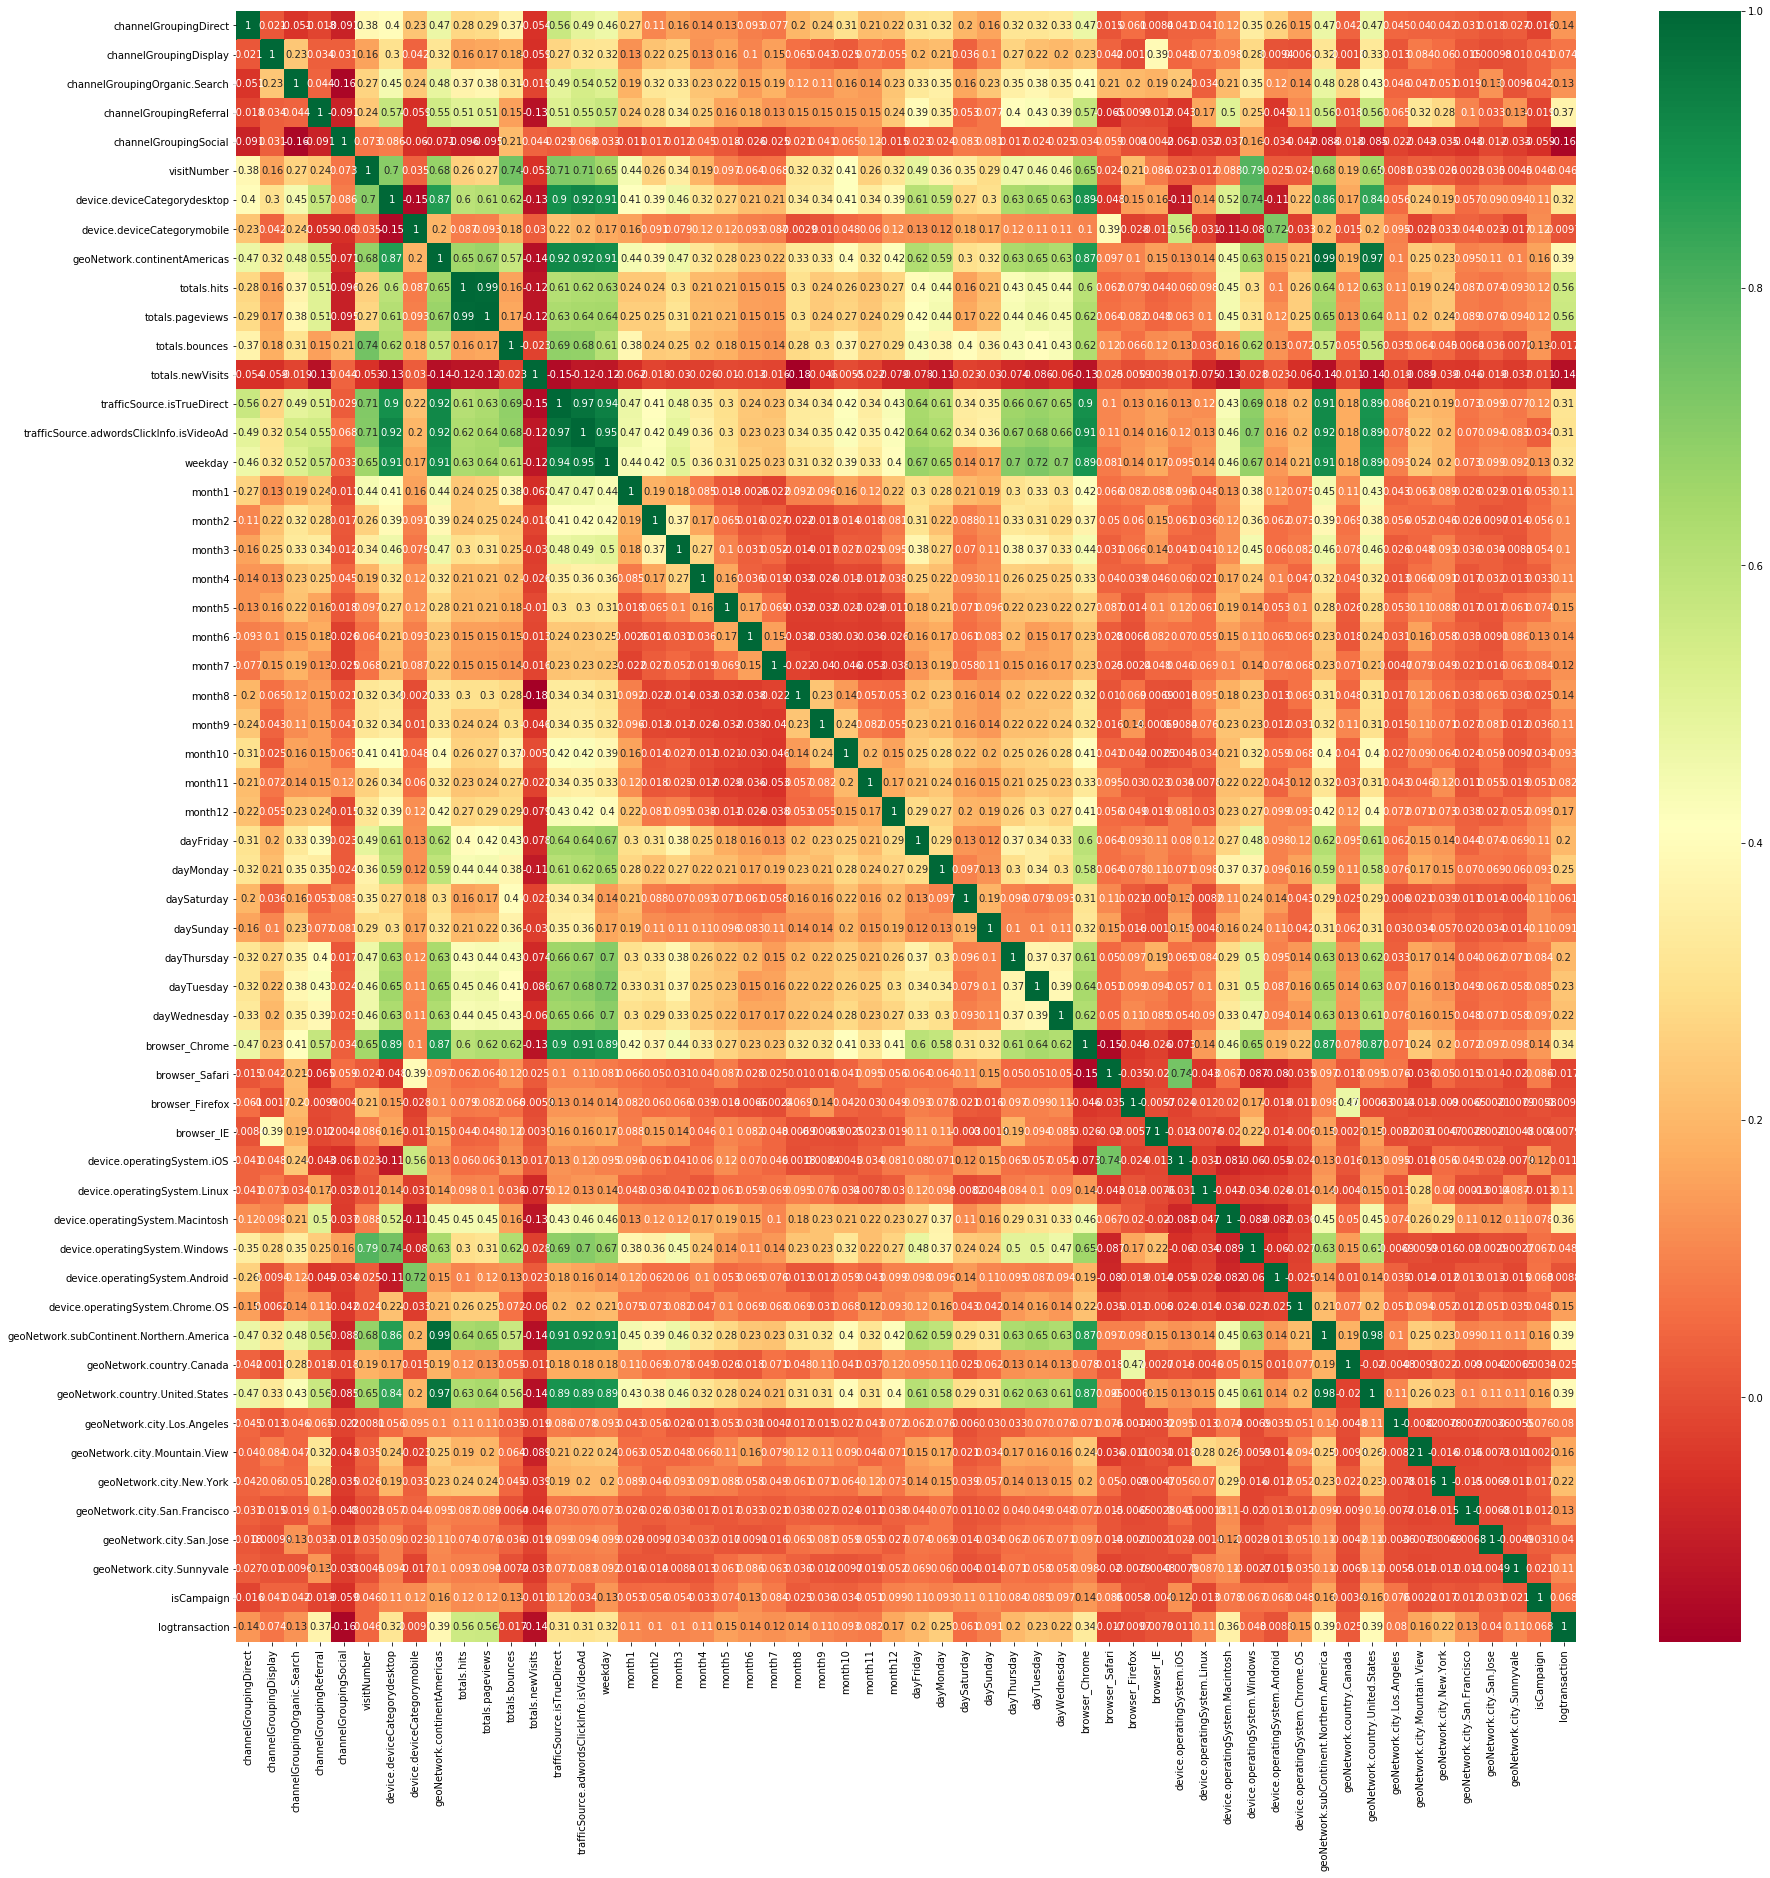

In [114]:
X = X_train  #independent columns
y = y_train   #target column i.e price range
#get correlations of each features in dataset
corrmat = data_train.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(30,30))
#plot heat map
fig=sns.heatmap(data_train[top_corr_features].corr(),annot=True,cmap="RdYlGn")
plt.savefig("heatmap-.png")